In [1]:
import time
import numpy as np
import types
import os
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.special import zeta
import PRyM.PRyM_init as PRyMini
import PRyM.PRyM_thermo as PRyMthermo
import PRyM.test_main3 as test_main
#import PRyM.PRyM_jl_sys as PRyMjl
from numdifftools import Derivative
import PRyM.PRyM_eval_nTOp as PRyMevalnTOp
import PRyM.PRyM_nTOp as PRyMnTOp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#creates plots that Tim is looking for

'''PRyMini.compute_bckg_flag = True
PRyMini.save_bckg_flag = False
PRyMini.stasis_flag = True
PRyMini.verbose_flag = False
PRyMini.smallnet_flag = True
Tends = np.logspace(-3,1,200)



# Optional: write header only once
file_name = "results_small.txt"
with open(file_name, "w") as f:
    f.write("Tend Neff Omeganurel 1/Omeganunr YPCMB YPBBN DoHx1e5 He3oHx1e5 Li7oHx1e10\n")

for T in Tends:
    PRyMini.stasis_params['stasis_end_mev'] = T
    results = test_main.PRyMclass().PRyMresults()
    Neff_f, Omeganurel_f, OneOverOmeganunr_f, YPCMB_f, YPBBN_f, DoHx1e5_f, He3oHx1e5_f, Li7oHx1e10_f = results

    #Save this result immediately
    with open(file_name, "a") as f:
        f.write(f"{T:.6g} {Neff_f:.6g} {Omeganurel_f:.6g} {OneOverOmeganunr_f:.6g} "
                f"{YPCMB_f:.6g} {YPBBN_f:.6g} {DoHx1e5_f:.6g} {He3oHx1e5_f:.6g} {Li7oHx1e10_f:.6g}\n")'''

'PRyMini.compute_bckg_flag = True\nPRyMini.save_bckg_flag = False\nPRyMini.stasis_flag = True\nPRyMini.verbose_flag = False\nPRyMini.smallnet_flag = True\nTends = np.logspace(-3,1,200)\n\n\n\n# Optional: write header only once\nfile_name = "results_small.txt"\nwith open(file_name, "w") as f:\n    f.write("Tend Neff Omeganurel 1/Omeganunr YPCMB YPBBN DoHx1e5 He3oHx1e5 Li7oHx1e10\n")\n\nfor T in Tends:\n    PRyMini.stasis_params[\'stasis_end_mev\'] = T\n    results = test_main.PRyMclass().PRyMresults()\n    Neff_f, Omeganurel_f, OneOverOmeganunr_f, YPCMB_f, YPBBN_f, DoHx1e5_f, He3oHx1e5_f, Li7oHx1e10_f = results\n\n    #Save this result immediately\n    with open(file_name, "a") as f:\n        f.write(f"{T:.6g} {Neff_f:.6g} {Omeganurel_f:.6g} {OneOverOmeganunr_f:.6g} "\n                f"{YPCMB_f:.6g} {YPBBN_f:.6g} {DoHx1e5_f:.6g} {He3oHx1e5_f:.6g} {Li7oHx1e10_f:.6g}\n")'

In [3]:
#to import data
'''columns = [
    "Tend", "Neff", "Omeganurel", "OneOverOmeganunr",
    "YPCMB", "YPBBN", "DoHx1e5", "He3oHx1e5", "Li7oHx1e10"
]

# Read the space-separated file
df = pd.read_csv("results_small.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)'''

'columns = [\n    "Tend", "Neff", "Omeganurel", "OneOverOmeganunr",\n    "YPCMB", "YPBBN", "DoHx1e5", "He3oHx1e5", "Li7oHx1e10"\n]\n\n# Read the space-separated file\ndf = pd.read_csv("results_small.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)'

In [4]:
'''Tends = np.logspace(-3,1,50)
plasma_injects = np.linspace(0,1,50)

Tends = np.logspace(-3, 1, 50)
plasma_injects = np.linspace(0, 1, 50)

# Create a meshgrid
T_grid, plasma_grid = np.meshgrid(Tends, plasma_injects, indexing='ij')

# Flatten the grids and stack into pairs
grid_points = np.column_stack([T_grid.ravel(), plasma_grid.ravel()])'''

"Tends = np.logspace(-3,1,50)\nplasma_injects = np.linspace(0,1,50)\n\nTends = np.logspace(-3, 1, 50)\nplasma_injects = np.linspace(0, 1, 50)\n\n# Create a meshgrid\nT_grid, plasma_grid = np.meshgrid(Tends, plasma_injects, indexing='ij')\n\n# Flatten the grids and stack into pairs\ngrid_points = np.column_stack([T_grid.ravel(), plasma_grid.ravel()])"

In [ ]:
#code to creates data for 2d heatmaps
'''Tends = np.logspace(1, 2, 20)
plasma_injects = np.linspace(0, 1, 20)

# Create the full grid
T_grid, plasma_grid = np.meshgrid(Tends, plasma_injects, indexing='ij')

# Flatten into 1D arrays
T_ends = T_grid.ravel()
plasma_injects = plasma_grid.ravel()


PRyMini.compute_bckg_flag = True
PRyMini.save_bckg_flag = False
PRyMini.stasis_flag = True
PRyMini.verbose_flag = False
PRyMini.smallnet_flag = True




# Optional: write header only once
file_name = "results_grid_small.txt"
with open(file_name, "w") as f:
    f.write("Tend f Neff Omeganurel 1/Omeganunr YPCMB YPBBN DoHx1e5 He3oHx1e5 Li7oHx1e10\n")

for n in range(len(T_ends)):
    PRyMini.stasis_params['stasis_end_mev'] = T_ends[n]
    PRyMini.stasis_params['plasma_inject_frac'] = plasma_injects[n]
    results = test_main.PRyMclass().PRyMresults()
    Neff_f, Omeganurel_f, OneOverOmeganunr_f, YPCMB_f, YPBBN_f, DoHx1e5_f, He3oHx1e5_f, Li7oHx1e10_f = results

    #Save this result immediately
    with open(file_name, "a") as f:
        f.write(f"{T_ends[n]:.6g} {plasma_injects[n]:.6g} {Neff_f:.6g} {Omeganurel_f:.6g} {OneOverOmeganunr_f:.6g} "
                f"{YPCMB_f:.6g} {YPBBN_f:.6g} {DoHx1e5_f:.6g} {He3oHx1e5_f:.6g} {Li7oHx1e10_f:.6g}\n")'''

Text(0.5, 0, '$T_{\\rm{end}}$')

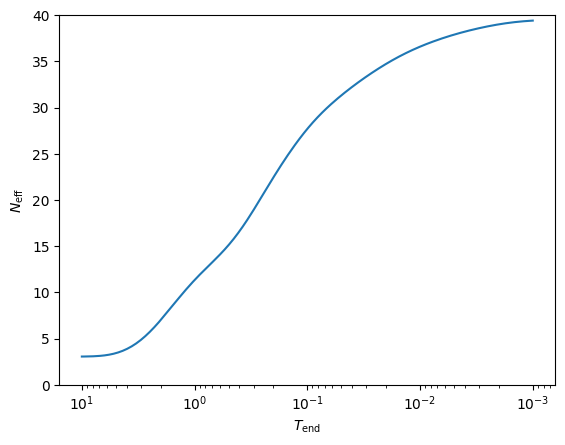

In [ ]:

'''T_ends = df['Tend'].tolist()
Neff = df['Neff'].tolist()

plt.plot(T_ends,Neff)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.ylim(0,40)
plt.ylabel(r"$N_{\rm{eff}}$")
plt.xlabel(r"$T_{\rm{end}}$")'''

In [24]:
columns = [
    "Tend", "f","Neff", "Omeganurel", "OneOverOmeganunr",
    "YPCMB", "YPBBN", "DoHx1e5", "He3oHx1e5", "Li7oHx1e10"
]

# Read the space-separated file
df_small = pd.read_csv("results_grid_small_nacre_0.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)

columns = [
    "Tend", "f","Neff", "Omeganurel", "OneOverOmeganunr",
    "YPCMB", "YPBBN", "DoHx1e5", "He3oHx1e5", "Li7oHx1e10"
]

# Read the space-separated file
df_large = pd.read_csv("results_grid_large0.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)

/tmp/ipykernel_2121053/3258796400.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_small = pd.read_csv("results_grid_small_nacre_0.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)
/tmp/ipykernel_2121053/3258796400.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_large = pd.read_csv("results_grid_large0.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)


In [25]:
#df

In [26]:
#df.columns

In [27]:
'''def plot_heatmap(ax, x, y, z, title, vmin=None, vmax=None):
    # Convert to numpy arrays
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    # Infer grid shape
    x_unique = np.unique(x)
    y_unique = np.unique(y)
    nx = len(x_unique)
    ny = len(y_unique)

    # Reshape z
    sort_idx = np.lexsort((x, y))
    z_sorted = z[sort_idx].reshape(ny, nx)

    # Plot
    c = ax.imshow(z_sorted,
                  extent=[x.min(), x.max(), y.min(), y.max()],
                  origin='lower',
                  aspect='auto',
                  vmin=vmin,
                  vmax=vmax)
    #ax.set_title(title)
    ax.set_xscale('log')
    #ax.set_zscale('log')
    #ax.set_yscale('log')
    
    return c'''

"def plot_heatmap(ax, x, y, z, title, vmin=None, vmax=None):\n    # Convert to numpy arrays\n    x = np.array(x)\n    y = np.array(y)\n    z = np.array(z)\n\n    # Infer grid shape\n    x_unique = np.unique(x)\n    y_unique = np.unique(y)\n    nx = len(x_unique)\n    ny = len(y_unique)\n\n    # Reshape z\n    sort_idx = np.lexsort((x, y))\n    z_sorted = z[sort_idx].reshape(ny, nx)\n\n    # Plot\n    c = ax.imshow(z_sorted,\n                  extent=[x.min(), x.max(), y.min(), y.max()],\n                  origin='lower',\n                  aspect='auto',\n                  vmin=vmin,\n                  vmax=vmax)\n    #ax.set_title(title)\n    ax.set_xscale('log')\n    #ax.set_zscale('log')\n    #ax.set_yscale('log')\n\n    return c"

In [28]:
def plot_heatmap(ax, x, y, z, title, vmin=None, vmax=None, log_scale=False, contour_level=None,contour_std_hi = None,contour_std_lo = None):
    import numpy as np
    from matplotlib.colors import LogNorm

    # Convert to numpy arrays
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    # Infer grid shape
    x_unique = np.unique(x)
    y_unique = np.unique(y)
    nx = len(x_unique)
    ny = len(y_unique)

    # Reshape z
    sort_idx = np.lexsort((x, y))
    z_sorted = z[sort_idx].reshape(ny, nx)

    # Choose normalization
    norm = LogNorm(vmin=vmin, vmax=vmax) if log_scale else None

    # Plot heatmap
    c = ax.imshow(z_sorted,
                  extent=[x.min(), x.max(), y.min(), y.max()],
                  origin='lower',
                  aspect='auto',
                  norm=norm if log_scale else None,
                  vmin=None if log_scale else vmin,
                  vmax=None if log_scale else vmax)

    # Contour at specific z level
    if contour_level is not None:
        contour = ax.contour(x_unique, y_unique, z_sorted,
                             levels=[contour_level - contour_std_lo,contour_level,contour_level + contour_std_hi],
                             colors='black',
                             linewidths=1)
        #ax.clabel(contour, fmt={contour_level + contour_std: r'$+2 \sigma$'}, fontsize=8)
        #ax.clabel(contour, fmt={contour_level - contour_std: r'$-2 \sigma$'}, fontsize=8)
        fmt = {contour_level - contour_std_lo: r'$-2 \sigma$',contour_level: r'$0 \sigma$',contour_level + contour_std_hi: r'$+2 \sigma$'}
        ax.clabel(contour, fmt=fmt, fontsize=8)

    # Labels and title
    #ax.set_title(title)
    #ax.set_xscale('log')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return c

In [29]:
#creates 2D heat maps relative difference between the small nuclear network and the large nuclear network

'''# Create four different (x, y) grids
x1 = df_small['Tend'].tolist()
y1 = df_small['f'].tolist()
#X1, Y1 = np.meshgrid(x1, y1)
z1 = abs(((df_small['Neff']-df_large['Neff'])/df_small['Neff'])).tolist()

x2 = df_small['Tend'].tolist()
y2 = df_small['f'].tolist()
#X2, Y2 = np.meshgrid(x2, y2)
#z2 = df['Li7oHx1e10'].tolist()
#z2 = (df_small['Li7oHx1e10'].tolist()-df_large['Li7oHx1e10'].tolist())/df_small['Li7oHx1e10'].tolist()
z2 = abs(((df_small['Li7oHx1e10']-df_large['Li7oHx1e10'])/df_small['Li7oHx1e10'])).tolist()

x3 = df_small['Tend'].tolist()
y3 = df_small['f'].tolist()
#X3, Y3 = np.meshgrid(x3, y3)
#z3 = df['YPCMB'].tolist()
#z3 = (df_small['YPCMB'].tolist()-df_large['YPCMB'].tolist())/df_small['YPCMB'].tolist()
z3 = abs(((df_small['YPCMB']-df_large['YPCMB'])/df_small['YPCMB'])).tolist()

x4 = df_small['Tend'].tolist()
y4 = df_small['f'].tolist()
#X4, Y4 = np.meshgrid(x4, y4)
#z4 = df['DoHx1e5'].tolist()
#z4 = (df_small['DoHx1e5'].tolist()-df_large['DoHx1e5'].tolist())/df_small['DoHx1e5'].tolist()
z4 = abs(((df_small['DoHx1e5']-df_large['DoHx1e5'])/df_small['DoHx1e5'])).tolist()


# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

c1 = plot_heatmap(axs[0, 0], x1, y1, z1, 'sin(x² + y²)',0,.00001)
cb1 = fig.colorbar(c1, ax=axs[0, 0])
cb1.set_label("Neff rel. frac")
axs[0,0].set_xlabel("Tend")
axs[0,0].set_ylabel("fraction")

c2 = plot_heatmap(axs[0, 1], x2, y2, z2, 'cos(x) * sin(y)',0,.02)
#fig.colorbar(c2, ax=axs[0, 1])
cb2 = fig.colorbar(c2, ax=axs[0, 1])
cb2.set_label("Li7oHx1e10 rel. frac")
axs[0,1].set_xlabel("Tend")
axs[0,1].set_ylabel("fraction")


c3 = plot_heatmap(axs[1, 0], x3, y3, z3, 'exp(-x² - y²)',0,.0005)
#fig.colorbar(c3, ax=axs[1, 0])
cb3 = fig.colorbar(c3, ax=axs[1, 0])
cb3.set_label("YPCMB rel. frac")
axs[1,0].set_xlabel("Tend")
axs[1,0].set_ylabel("fraction")

c4 = plot_heatmap(axs[1, 1], x4, y4, z4, 'x * y',0,.02)
#fig.colorbar(c4, ax=axs[1, 1])
cb4 = fig.colorbar(c4, ax=axs[1, 1])
cb4.set_label("DoHx1e5 rel. frac")
axs[1,1].set_xlabel("Tend")
axs[1,1].set_ylabel("fraction")


plt.tight_layout()
plt.savefig('2d_heatmap_rel_dif.pdf')
plt.show()'''

'# Create four different (x, y) grids\nx1 = df_small[\'Tend\'].tolist()\ny1 = df_small[\'f\'].tolist()\n#X1, Y1 = np.meshgrid(x1, y1)\nz1 = abs(((df_small[\'Neff\']-df_large[\'Neff\'])/df_small[\'Neff\'])).tolist()\n\nx2 = df_small[\'Tend\'].tolist()\ny2 = df_small[\'f\'].tolist()\n#X2, Y2 = np.meshgrid(x2, y2)\n#z2 = df[\'Li7oHx1e10\'].tolist()\n#z2 = (df_small[\'Li7oHx1e10\'].tolist()-df_large[\'Li7oHx1e10\'].tolist())/df_small[\'Li7oHx1e10\'].tolist()\nz2 = abs(((df_small[\'Li7oHx1e10\']-df_large[\'Li7oHx1e10\'])/df_small[\'Li7oHx1e10\'])).tolist()\n\nx3 = df_small[\'Tend\'].tolist()\ny3 = df_small[\'f\'].tolist()\n#X3, Y3 = np.meshgrid(x3, y3)\n#z3 = df[\'YPCMB\'].tolist()\n#z3 = (df_small[\'YPCMB\'].tolist()-df_large[\'YPCMB\'].tolist())/df_small[\'YPCMB\'].tolist()\nz3 = abs(((df_small[\'YPCMB\']-df_large[\'YPCMB\'])/df_small[\'YPCMB\'])).tolist()\n\nx4 = df_small[\'Tend\'].tolist()\ny4 = df_small[\'f\'].tolist()\n#X4, Y4 = np.meshgrid(x4, y4)\n#z4 = df[\'DoHx1e5\'].tolist()\n#z4

In [30]:
def plot_heatmap(ax, x, y, z, title, vmin=None, vmax=None, log_scale=True,
                 contour_level=None, contour_std_hi=None, contour_std_lo=None):
    import numpy as np
    from matplotlib.colors import LogNorm

    # Convert to numpy arrays
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    # Unique grid
    x_unique = np.unique(x)
    y_unique = np.unique(y)
    nx = len(x_unique)
    ny = len(y_unique)

    # Sort and reshape z
    sort_idx = np.lexsort((x, y))
    z_sorted = z[sort_idx].reshape(ny, nx)

    # Normalize for log scale
    #norm = LogNorm(vmin=vmin, vmax=vmax) if log_scale else None
    norm = None

    # Set extent based on scale
    extent = [np.log10(x.min()), np.log10(x.max()), y.min(), y.max()] if log_scale else \
             [x.min(), x.max(), y.min(), y.max()]

    # Rescale x for log if needed
    x_plot = np.log10(x_unique) if log_scale else x_unique

    # Plot heatmap
    c = ax.imshow(z_sorted,
                  extent=extent,
                  origin='lower',
                  aspect='auto',
                  norm=norm,
                  vmin=vmin if log_scale else vmin,
                  vmax=vmax if log_scale else vmax)

    # Plot contours
    if contour_level is not None:
        contour = ax.contour(x_plot, y_unique, z_sorted,
                             levels=[contour_level - contour_std_lo,
                                     contour_level,
                                     contour_level + contour_std_hi],
                             colors='black',
                             linewidths=1)
        fmt = {
            contour_level - contour_std_lo: r'$-2 \sigma$',
            contour_level: r'$0 \sigma$',
            contour_level + contour_std_hi: r'$+2 \sigma$'
        }
        ax.clabel(contour, fmt=fmt, fontsize=8)

    # Axis labels and scaling
    ax.set_xlabel('x (log scale)' if log_scale else 'x')
    ax.set_ylabel('y')
    #if log_scale:
    #    ax.set_xticks(np.log10(x_unique))
    #    ax.set_xticklabels([f"{val:.1e}" for val in x_unique])
    ax.set_title(title)

    return c

ValueError: cannot reshape array of size 234 into shape (20,12)

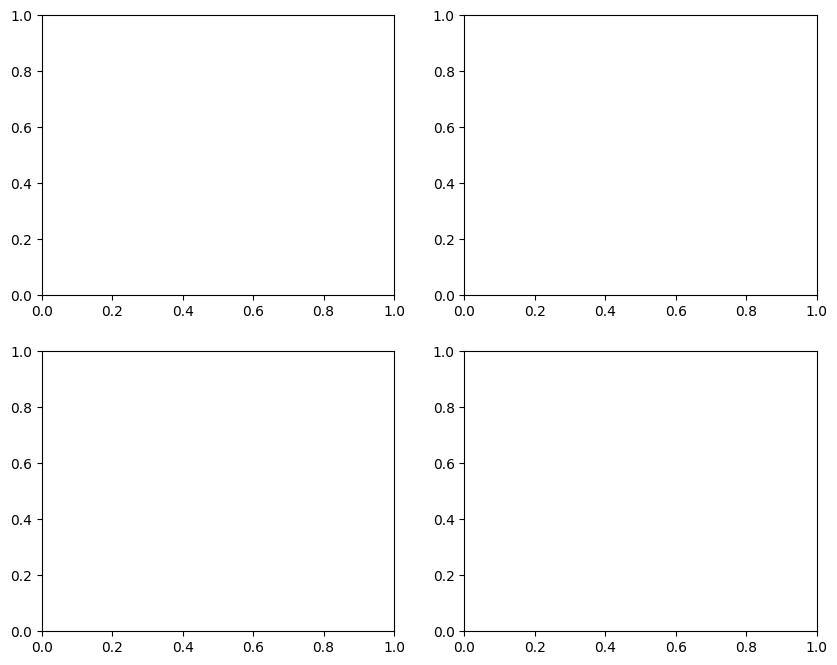

In [ ]:
#creates 2D heat maps relative difference between the small nuclear network and the large nuclear network

#if True, use Subaru, if False use PDG
Subaru = False
if Subaru:
    #Neff
    contour_level_1, contour_std_hi_1, contour_std_lo_1 = 2.37, (0.19)*2,0.24*2
    #LioH
    contour_level_2, contour_std_hi_2, contour_std_lo_2 = 1.07152, 3.63574e-1, 5.50291e-1 #2 sigma included
    #Yp
    contour_level_3, contour_std_hi_3, contour_std_lo_3 = 0.2370, 0.0034*2, 0.0033*2
    #DoH
    contour_level_4, contour_std_hi_4, contour_std_lo_4 = 2.527, 0.03*2, 0.03*2
else:
    #Neff
    contour_level_1, contour_std_hi_1, contour_std_lo_1 = 3.85, 0.62*2, 0.62*2
    #contour_level_1, contour_std_hi_1, contour_std_lo_1 = z1[-1], 0.62*2, 0.62*2
    #LioH
    contour_level_2, contour_std_hi_2, contour_std_lo_2 = 1.63, 0.3*2, 0.3*2
    #contour_level_2, contour_std_hi_2, contour_std_lo_2 = z2[-1], 0.3*2, 0.3*2
    #contour_level_3, contour_std_hi_3, contour_std_lo_3 = 4, 0.3*2, 0.3*2
    #Yp
    contour_level_3, contour_std_hi_3, contour_std_lo_3 = 0.245, 0.003*2, 0.003*2
    #contour_level_3, contour_std_hi_3, contour_std_lo_3 = z3[-1], 0.003*2, 0.003*2
    #contour_level_3, contour_std_hi_3, contour_std_lo_3 = z3[-1], 0.03*2, 0.03*2
    #contour_level_2, contour_std_hi_2, contour_std_lo_2 = 0.25, 0.01, 0.01
    #DoH
    contour_level_4, contour_std_hi_4, contour_std_lo_4 = 2.547, 0.029*2, 0.029*2
    #contour_level_4, contour_std_hi_4, contour_std_lo_4 = z4[-1], 0.029*2, 0.029*2

# Create four different (x, y) grids
x1 = df_small['Tend'].tolist()
y1 = df_small['f'].tolist()
#X1, Y1 = np.meshgrid(x1, y1)
z1 = df_small['Neff'].tolist()

x2 = df_small['Tend'].tolist()
y2 = df_small['f'].tolist()
#X2, Y2 = np.meshgrid(x2, y2)
#z2 = df['Li7oHx1e10'].tolist()
#z2 = (df_small['Li7oHx1e10'].tolist()-df_large['Li7oHx1e10'].tolist())/df_small['Li7oHx1e10'].tolist()
z2 = df_small['Li7oHx1e10'].tolist()

x3 = df_small['Tend'].tolist()
y3 = df_small['f'].tolist()
#X3, Y3 = np.meshgrid(x3, y3)
#z3 = df['YPCMB'].tolist()
#z3 = (df_small['YPCMB'].tolist()-df_large['YPCMB'].tolist())/df_small['YPCMB'].tolist()
z3 = df_small['YPCMB'].tolist()

x4 = df_small['Tend'].tolist()
y4 = df_small['f'].tolist()
#X4, Y4 = np.meshgrid(x4, y4)
#z4 = df['DoHx1e5'].tolist()
#z4 = (df_small['DoHx1e5'].tolist()-df_large['DoHx1e5'].tolist())/df_small['DoHx1e5'].tolist()
z4 = df_small['DoHx1e5'].tolist()


# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#Neff
c1 = plot_heatmap(axs[0, 0], x1, y1, z1, '',0,5, contour_level = contour_level_1, contour_std_hi = contour_std_hi_1, contour_std_lo = contour_std_lo_1)
cb1 = fig.colorbar(c1, ax=axs[0, 0])
cb1.set_label("Neff")
axs[0,0].set_xlabel("log(Tend)")
axs[0,0].set_ylabel("fraction")
#axs[0,0].set_xscale('log')

#z_level = 3  # for example
#contour = ax.contour(x_unique, y_unique, z_sorted, levels=[z_level], colors='white', linewidths=1)
#ax.clabel(contour, fmt={z_level: f'z = {z_level:.0e}'}, fontsize=8)

#LioH
c2 = plot_heatmap(axs[0, 1], x2, y2, z2, '',0,10,contour_level = contour_level_2, contour_std_hi = contour_std_hi_2, contour_std_lo = contour_std_lo_2)#,contour_level=1.5,contour_std = 0.5)
#fig.colorbar(c2, ax=axs[0, 1])
cb2 = fig.colorbar(c2, ax=axs[0, 1])
cb2.set_label("Li7oHx1e10")
axs[0,1].set_xlabel("log(Tend)")
axs[0,1].set_ylabel("fraction")
#axs[0,1].set_xscale('log')

#YPCMB
c3 = plot_heatmap(axs[1, 0], x3, y3, z3, '',.23,.25,contour_level=contour_level_3,contour_std_hi = contour_std_hi_3,contour_std_lo = contour_std_lo_3)#contour_level = contour_level_3, contour_std_hi = contour_std_hi_3, contour_std_lo = contour_std_lo_3)#contour_level=0.25,contour_std = 0.0005)
#fig.colorbar(c3, ax=axs[1, 0])
cb3 = fig.colorbar(c3, ax=axs[1, 0])
cb3.set_label("YPCMB")
axs[1,0].set_xlabel("log(Tend)")
axs[1,0].set_ylabel("fraction")
#axs[1,0].set_xlim(0.1,10)
#axs[1,0].set_xscale('log')

#DoH
c4 = plot_heatmap(axs[1, 1], x4, y4, z4, '',1,4,contour_level = contour_level_4, contour_std_hi = contour_std_hi_4, contour_std_lo = contour_std_lo_4)#contour_level=2.53,contour_std = 0.1)
#fig.colorbar(c4, ax=axs[1, 1])
cb4 = fig.colorbar(c4, ax=axs[1, 1])
cb4.set_label("DoHx1e5")
axs[1,1].set_xlabel("log(Tend)")
axs[1,1].set_ylabel("fraction")
#axs[1,1].set_xscale('log')
#axs[1,1].set_xscale('log')


plt.tight_layout()
plt.savefig(f'2d_heatmap_sub_{Subaru}.pdf')
plt.show()

In [38]:
z1

[3.04442,
 3.04441,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04441,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04441,
 3.04441,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04442,
 3.04441,
 3.04441,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04442,
 3.04441,
 3.04441,
 3.04442,
 3.04441,
 3.04441,
 3.04441,
 3.04442,
 3.04441,
 3.04441,
 3.04442,
 3.04441,
 3.04442,
 3.04441,
 3.04442,
 3.04442,
 3.04441,
 3.04441,
 3.04441,
 3.04442,
 3.04441,
 3.04441,
 3.04441,
 3.04441,
 3.04442,
 3.04442,
 3.04441,
 3.04442,


In [32]:
min(x1),min(y1),min(z1)

(0.01, 0.0, 0.0211443)